In [1]:
import lzma
import pickle

import pandas as pd
from sc2.ids.unit_typeid import UnitTypeId
from sc2.unit import Race
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from phantom.scout_predictor import PlayerVision, ScoutPredictor

In [2]:
df_train = pd.read_parquet("../resources/datasets/scout/train.parquet")
df_test = pd.read_parquet("../resources/datasets/scout/test.parquet")

In [ ]:
unit_types = [UnitTypeId.DRONE, UnitTypeId.PROBE, UnitTypeId.SCV]
unit_types = []
model = make_pipeline(
    StandardScaler(),
    MLPRegressor(),
)
predictor = ScoutPredictor(model, unit_types)
predictor.train(df_train)
predictor.prediction_error(df_test)

In [ ]:
vision = PlayerVision(
    composition={},
    enemy_composition={UnitTypeId.DRONE: 12},
)
player_races = {
    1: Race.Zerg,
    2: Race.Protoss,
}
enemy_vision = predictor.predict(1000, vision, player_races)
enemy_vision

PlayerVision(composition={UnitTypeId.BARRACKSTECHLAB: np.float64(0.0), UnitTypeId.LURKERDENMP: np.float64(0.0), UnitTypeId.LURKERMP: np.float64(0.0), UnitTypeId.TWILIGHTCOUNCIL: np.float64(0.012580266832036752), UnitTypeId.STARPORTREACTOR: np.float64(0.0), UnitTypeId.REFINERY: np.float64(-0.6519989986416961), UnitTypeId.STARPORTFLYING: np.float64(0.0), UnitTypeId.ULTRALISKCAVERN: np.float64(0.0), UnitTypeId.LURKERMPBURROWED: np.float64(0.0), UnitTypeId.FACTORY: np.float64(-0.23864776748623406), UnitTypeId.NYDUSNETWORK: np.float64(0.0), UnitTypeId.REFINERYRICH: np.float64(0.0), UnitTypeId.CHANGELINGZERGLING: np.float64(0.0), UnitTypeId.DRONEBURROWED: np.float64(0.0), UnitTypeId.FUSIONCORE: np.float64(0.01746387181787252), UnitTypeId.VIPER: np.float64(0.002953040118803152), UnitTypeId.NYDUSCANALCREEPER: np.float64(0.0), UnitTypeId.ORACLESTASISTRAP: np.float64(0.0), UnitTypeId.HIVE: np.float64(0.0), UnitTypeId.RESOURCEBLOCKER: np.float64(0.0), UnitTypeId.VOIDRAY: np.float64(0.012139515710

In [ ]:
predictor.prediction_error(df_test)

array([3.33768054e+00, 1.35781978e-04, 9.76693706e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.58006492e-02, 0.00000000e+00,
       4.21061270e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.55020340e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.43291656e-01, 2.65272472e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.81580819e-02,
       2.53236954e-02, 0.00000000e+00, 0.00000000e+00, 6.11115234e-02,
       4.21241821e-02, 8.08783129e-02, 0.00000000e+00, 0.00000000e+00,
       1.84789251e+00, 0.00000000e+00, 0.00000000e+00, 5.29051982e-03,
       0.00000000e+00, 8.24139859e-01, 5.85914975e-02, 0.00000000e+00,
       1.52960765e-01, 1.44038906e-01, 0.00000000e+00, 0.00000000e+00,
       1.74194570e-01, 4.12280826e+00, 1.69698024e+00, 0.00000000e+00,
       7.80674557e-01, 1.94114776e-02, 1.86939972e-02, 4.05935345e-02,
       0.00000000e+00, 2.60619973e-02, 3.79126436e-01, 0.00000000e+00,
      

In [ ]:
with lzma.open("../models/scout.pkl.xz", "wb") as f:
    pickle.dump(predictor.model, f)

<Axes: xlabel='game_loop', ylabel='count'>

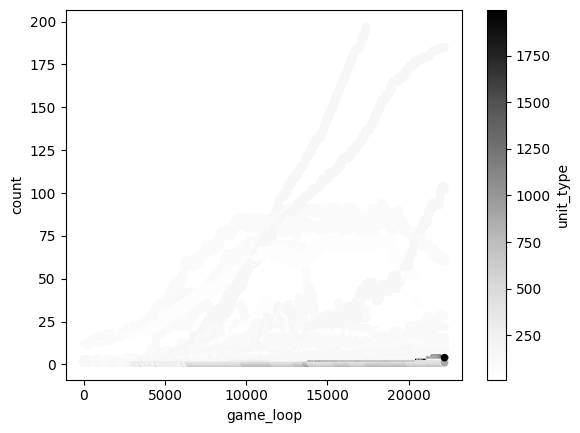

In [ ]:
df_test[df_test["player"] == df_test["owner"]].plot.scatter(x="game_loop", y="count", c="unit_type")